In [2]:
import pandas as pd
# load the dataset
data = pd.read_csv("Insurance claims data.csv")

In [3]:
data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [4]:
data.columns

Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')

Preprocessing

In [5]:

# policy_id: Unique identifier for the insurance policy.
# subscription_length: The duration for which the insurance policy is active.
# customer_age: Age of the insurance policyholder, which can influence the likelihood of claims.
# vehicle_age: Age of the vehicle insured, which may affect the probability of claims due to factors like wear and tear.
# model: The model of the vehicle, which could impact the claim frequency due to model-specific characteristics.
# fuel_type: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG), which might influence the risk profile and claim likelihood.
# max_torque, max_power: Engine performance characteristics that could relate to the vehicle’s mechanical condition and claim risks.
# engine_type: The type of engine, which might have implications for maintenance and claim rates.
# displacement, cylinder: Specifications related to the engine size and construction, affecting the vehicle’s performance and potentially its claim history.
# region_code: The code representing the geographical region of the policyholder, as claim patterns can vary regionally.
# region_density: Population density of the policyholder’s region, which could correlate with accident and claim frequencies.
# airbags: The number of airbags in the vehicle, indicating safety level which can influence claim probability.
# is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System): Features that enhance vehicle safety and could potentially reduce the likelihood of claims.
# is_parking_sensors, is_parking_camera: Parking aids that might affect the probability of making a claim, especially in urban areas.
# rear_brakes_type: Type of rear brakes, which could be related to the vehicle’s stopping capability and safety.
# Features like steering_type, turning_radius, length, width, gross_weight, and various other binary indicators (Yes/No) for specific vehicle amenities and safety features, which together build a profile of the vehicle’s characteristics and its associated risk factors.
# claim_status: Indicates whether a claim was made (1) or not (0), which is the dependent variable the model aims to predict.  



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [7]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [8]:
# policy_id: Unique identifier for the insurance policy
# subscription_length, vehicle_age, customer_age: Numeric attributes related to the policy, vehicle, and customer
# region_code, segment, model, fuel_type: Categorical attributes representing the region, vehicle segment, model, and fuel type
# max_torque, max_power, engine_type: Specifications of the vehicle’s engine
# airbags, is_esc, is_adjustable_steering: Features related to the vehicle’s safety and convenience
# claim_status: Target variable indicating whether a claim was made (1) or not (0)

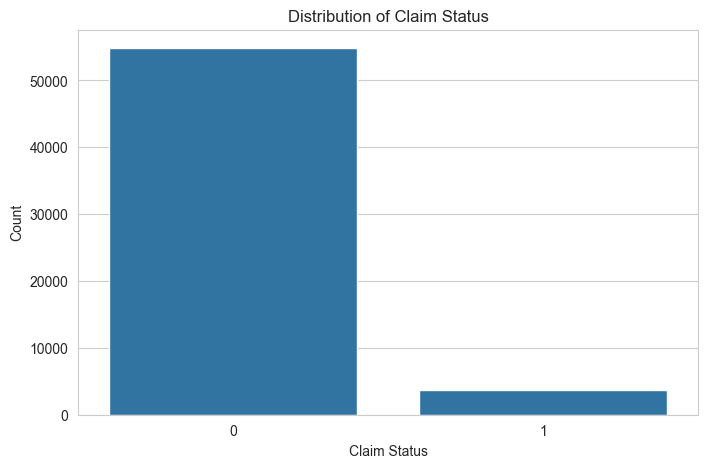

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# plot the distribution of the target variable 'claim_status'
plt.figure(figsize=(8, 5))
sns.countplot(x='claim_status', data=data)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

In [23]:
data['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

The distribution of the claim_status shows a significant imbalance between the classes, with much fewer claims (1) compared to no claims (0). This imbalance will be a challenge to address during the model training phase to ensure our model does not become biased toward predicting the majority class.

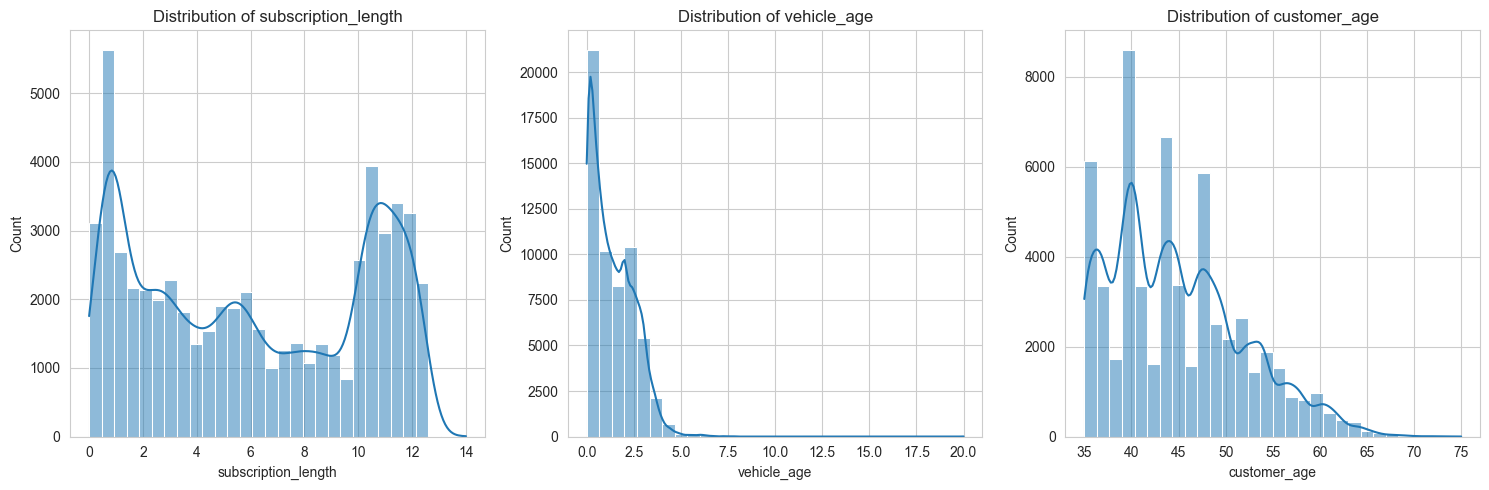

In [28]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length', 'vehicle_age', 'customer_age']

# plotting distributions of numerical features
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

subscription_length: Most values are clustered around lower numbers, indicating that many policies have shorter subscription lengths.
vehicle_age: This distribution is somewhat uniform but with spikes at specific ages, possibly representing common vehicle age intervals in the dataset.
customer_age: This shows a fairly normal distribution, with the majority of customers falling within a middle-age range.

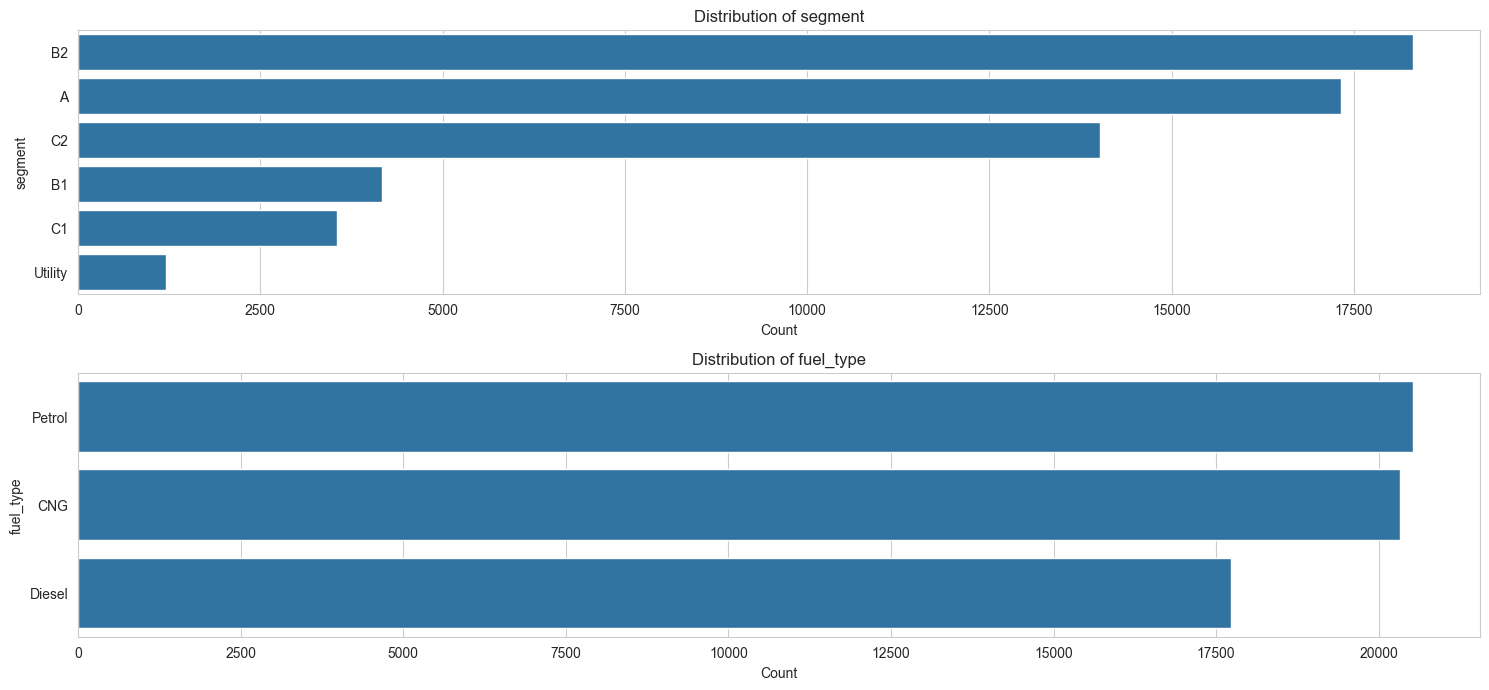

In [32]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['segment', 'fuel_type']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

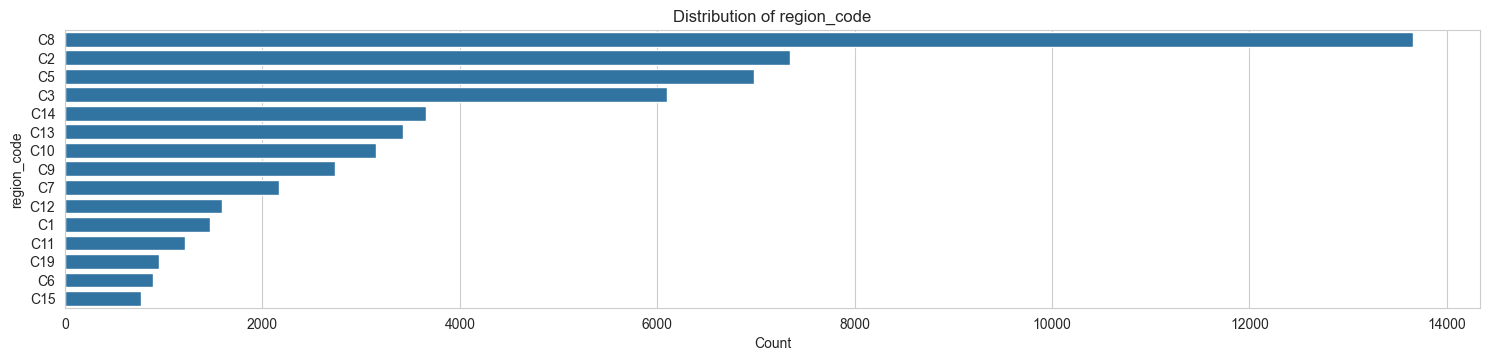

In [37]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code']

# plotting distributions of categorical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 1, i)
    sns.countplot(y=column, data=data, order = data[column].value_counts().nlargest(15).index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

For ‘region_code,’ there is a wide variety of codes, each with varying counts, but a few specific codes dominate with much higher counts than others. In the ‘segment’ distribution, there are fewer categories, with the ‘B2’ segment being the most common, followed by ‘A’ and ‘C2,’ and the ‘Utility’ segment being the least common. Lastly, ‘fuel_type’ shows three categories: ‘Petrol’ has the highest count than CNG and Diesel.



The next step is to balance the dataset using oversampling to handle the class imbalance observed in the claim_status. Let’s proceed with balancing the classes:



In [40]:
from sklearn.utils import resample

# separate majority and minority classes
majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.claim_status.value_counts()

oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

In [44]:
oversampled_data['claim_status'].value_counts()

claim_status
0    54844
1    54844
Name: count, dtype: int64

In [51]:
oversampled_data.head()

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [47]:
data['claim_status'].value_counts()

claim_status
0    54844
1     3748
Name: count, dtype: int64

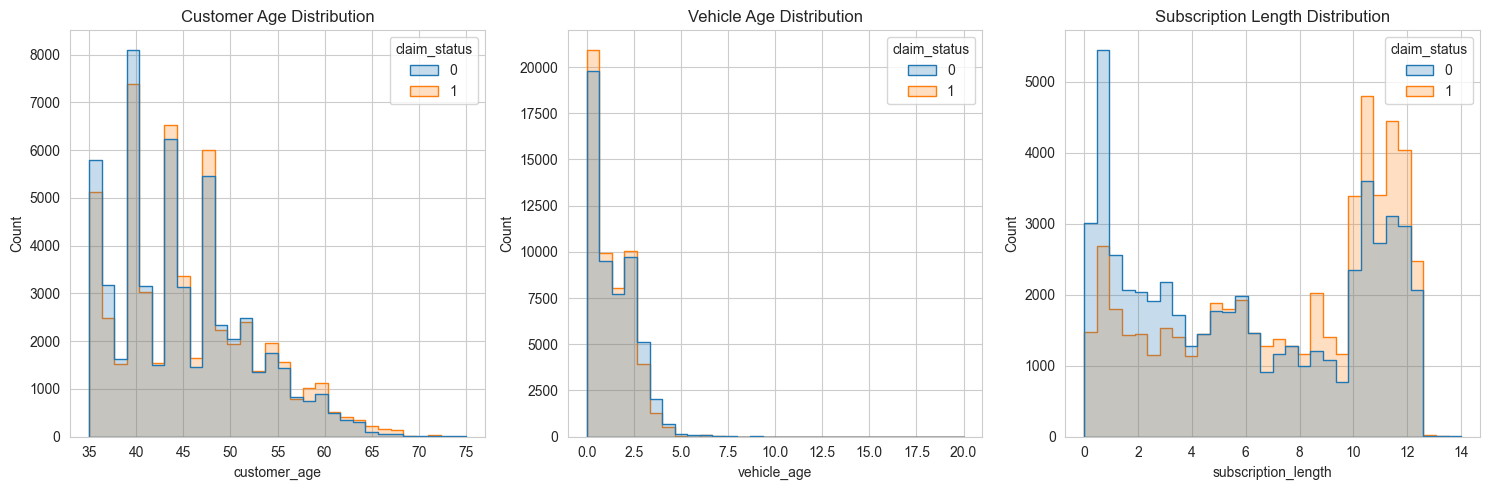

In [53]:
# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15, 5))

# 'customer_age' distribution
plt.subplot(1, 3, 1)
sns.histplot(data=oversampled_data, x='customer_age', hue='claim_status', element='step', bins=30)
plt.title('Customer Age Distribution')

# 'vehicle_age' distribution
plt.subplot(1, 3, 2)
sns.histplot(data=oversampled_data, x='vehicle_age', hue='claim_status', element='step', bins=30)
plt.title('Vehicle Age Distribution')

# 'subscription_length' distribution
plt.subplot(1, 3, 3)
sns.histplot(data=oversampled_data, x='subscription_length', hue='claim_status', element='step', bins=30)
plt.title('Subscription Length Distribution')

plt.tight_layout()
plt.show()

Feature selection

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# separate features and target variable
X = encoded_data.drop('claim_status', axis=1)
y = encoded_data['claim_status']

# create a random forest classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df.head(10)


,Feature,Importance
0,policy_id,0.321072
1,subscription_length,0.248309
3,customer_age,0.176639
2,vehicle_age,0.135190
5,region_density,0.053838
4,region_code,0.052649
7,model,0.000957
24,length,0.000846
26,gross_weight,0.000834
11,engine_type,0.000791


In [61]:
# policy_id: Unique identifier for the insurance policy
# subscription_length: Length of the insurance subscription
# customer_age: Age of the customer
# vehicle_age: Age of the vehicle
# region_density: Population density of the region
# region_code: Code representing the region
# model: Model of the vehicle
# engine_type: Type of engine in the vehicle
# gross_weight: Gross weight of the vehicle
# length: Length of the vehicle

The next step is to build a predictive model using the oversampled data. Given the nature of the task (binary classification), a suitable algorithm could be logistic regression, random forest, or gradient boosting. Considering the effectiveness of random forests in handling both numerical and categorical data and their ability to model complex interactions, we’ll proceed with a Random Forest classifier:



In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# drop 'Policy_id' column from the data
oversampled_data = oversampled_data.drop('policy_id', axis=1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis=1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



In [80]:
X_oversampled

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
1,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,...,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4
2,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
3,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
4,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45723,11.6,0.2,54,C5,34738,B1,M8,CNG,82.1Nm@3400rpm,55.92bhp@5300rpm,...,No,No,Yes,Yes,Yes,No,No,Yes,Yes,2
36093,11.3,1.0,61,C5,34738,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
54154,7.7,0.0,49,C11,6108,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
48891,11.2,1.0,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3


Precision: Đối với lớp 0 (no claim), độ chính xác là 1,00, nghĩa là khi mô hình dự đoán no claim, thì nó đúng 100% thời gian. Đối với lớp 1 (claim), độ chính xác là 0,96, nghĩa là khi mô hình dự đoán claim, thì nó đúng 96%.

Recall: Đối với lớp 0, độ thu hồi là 0,96, biểu thị rằng mô hình xác định đúng 96% tất cả các trường hợp No claim. Đối với lớp 1, độ thu hồi là 1,00, biểu thị rằng mô hình xác định đúng 100% tất cả các trường hợp khiếu nại thực tế.

F1 Score cho cả hai lớp là 0,98, cho thấy sự cân bằng cao giữa độ chính xác và độ thu hồi. Điều này có nghĩa là mô hình vừa chính xác vừa đáng tin cậy trong các dự đoán của nó trên cả hai lớp.


Accuracy: Độ chính xác tổng thể của mô hình là 98%, nghĩa là nó dự đoán đúng trạng thái khiếu nại cho 98% các trường hợp trong tập dữ liệu thử nghiệm.

Now, let’s label the original imbalanced data using our model to see how many instances are correctly classified from our model:



In [63]:
rf_model_oversampled

RandomForestClassifier(random_state=42)

In [76]:
original_encoded = data.drop('policy_id', axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}
for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

0        20
1        11
2        20
3         1
4         4
         ..
58587    17
58588    15
58589    20
58590    20
58591     3
Name: region_code, Length: 58592, dtype: int32
0        4
1        3
2        4
3        0
4        2
        ..
58587    2
58588    4
58589    2
58590    2
58591    2
Name: segment, Length: 58592, dtype: int32
0         5
1        10
2         5
3         0
4         6
         ..
58587     7
58588     5
58589     7
58590     7
58591     7
Name: model, Length: 58592, dtype: int32
0        1
1        1
2        1
3        0
4        1
        ..
58587    2
58588    1
58589    2
58590    2
58591    2
Name: fuel_type, Length: 58592, dtype: int32
0        4
1        2
2        4
3        5
4        3
        ..
58587    0
58588    4
58589    0
58590    0
58591    0
Name: max_torque, Length: 58592, dtype: int32
0        0
1        8
2        0
3        2
4        7
        ..
58587    6
58588    0
58589    6
58590    6
58591    6
Name: max_power, Length: 58592

In [69]:
original_encoded

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,0,1,1,1,1,1,1,1,4,0
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,0,0,0,1,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,0,1,1,1,0,0,1,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,17,34738,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
58588,2.3,2.2,37,15,4076,4,5,1,4,0,...,1,1,1,1,1,0,1,1,3,0
58589,6.6,2.2,35,20,8794,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0
58590,4.1,3.6,44,20,8794,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2,0


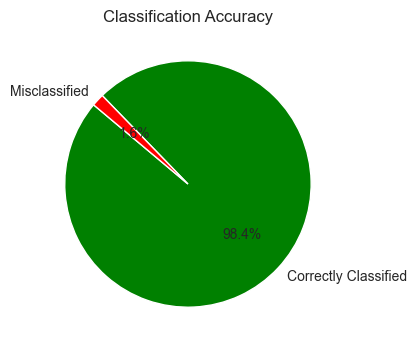

In [78]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title('Classification Accuracy')
plt.show()